## Problem Statement
In today's competitive retail environment, understanding customer purchasing
behavior is critical for designing effective marketing strategies. Customers
have different income levels, spending patterns, and preferences, making it
difficult for businesses to target them using a single marketing approach.

Without proper segmentation, marketing campaigns may fail to reach the right
audience, leading to low customer engagement and inefficient use of resources.
Therefore, it is essential to group customers into meaningful segments based on
their behavior and financial characteristics.

## Objective
The primary objective of this task is to segment customers into distinct groups
based on their annual income and spending score using unsupervised learning.

By applying K-Means clustering, this task aims to identify patterns in customer
behavior and classify customers into clusters with similar characteristics.
These clusters can then be used by businesses to design targeted marketing
campaigns, improve customer satisfaction, and maximize overall revenue.

## Dataset Description
The Mall Customers dataset contains demographic and spending-related information
of customers visiting a shopping mall.

The dataset includes the following attributes:
- CustomerID: Unique identifier for each customer
- Genre: Gender of the customer
- Age: Age of the customer
- Annual Income (k$): Customer’s annual income in thousand dollars
- Spending Score (1-100): A score assigned based on customer spending behavior

This dataset is widely used for customer segmentation tasks and helps in
understanding customer purchasing patterns.




## Import Required Libraries


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


## Dataset Loading


In [3]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Preprocessing
Encoding categorical features.

In [4]:
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


## Exploratory Data Analysis


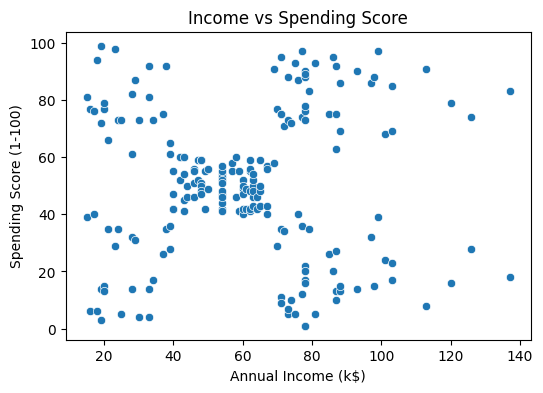

In [5]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    data=df
)
plt.title("Income vs Spending Score")
plt.show()


## Feature Selection and Scaling


In [6]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## K-Means Clustering


In [7]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

## Cluster Visualization using PCA


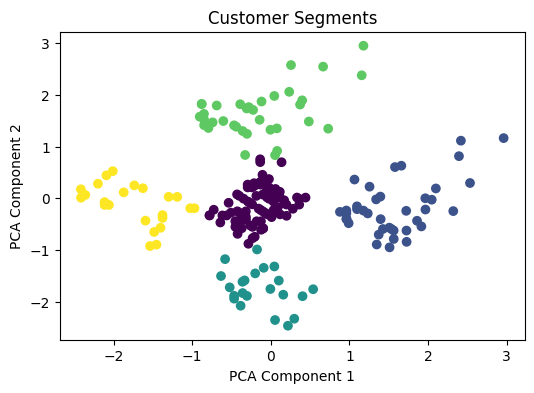

In [8]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,4))
plt.scatter(
    components[:, 0],
    components[:, 1],
    c=df['Cluster']
)
plt.title("Customer Segments")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


## Conclusion
Customers were successfully segmented into distinct groups based on
their income and spending behavior. These clusters can be used to
design targeted marketing strategies
